## Basics of probability

### When we flip the coin the probability of getting head is = 1/2

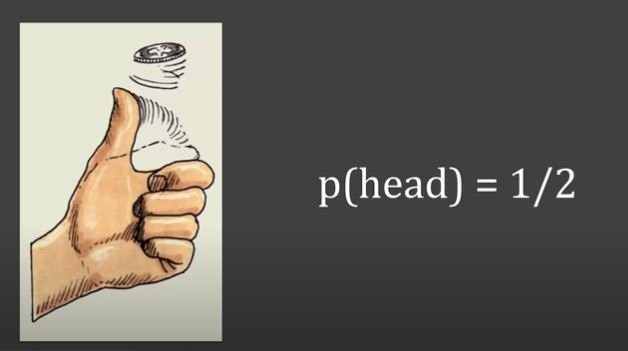

### Similarly when we pick a random card , the probability of getting a queen is = 4/52=1/13

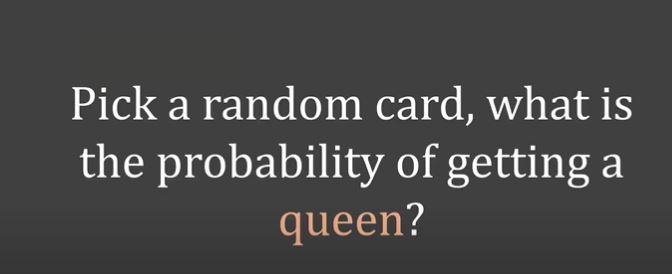

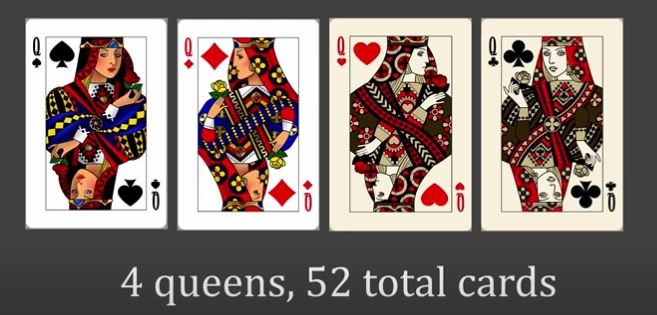

### Pick a random card , you know it is dimond . Now what is the probability of that card being a queen 

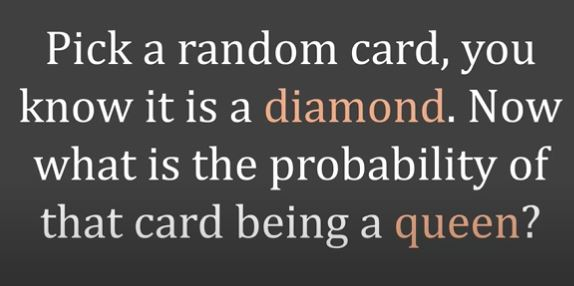

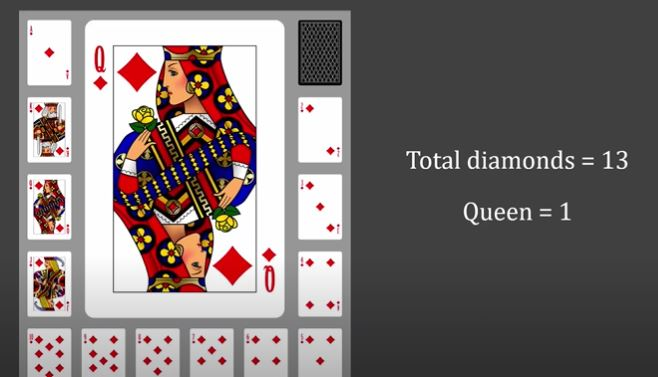

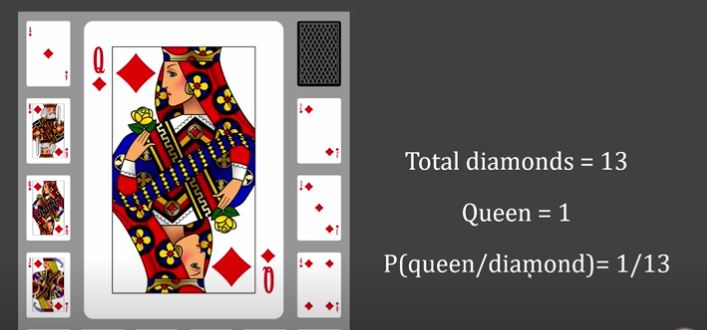

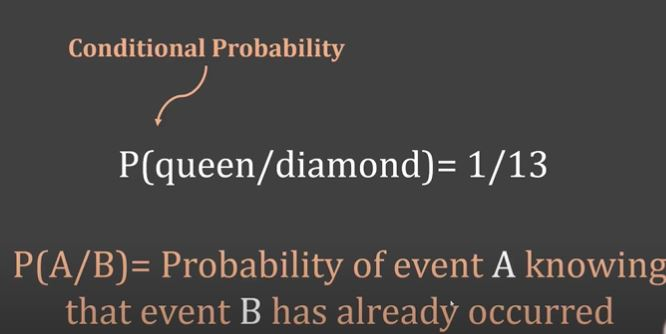

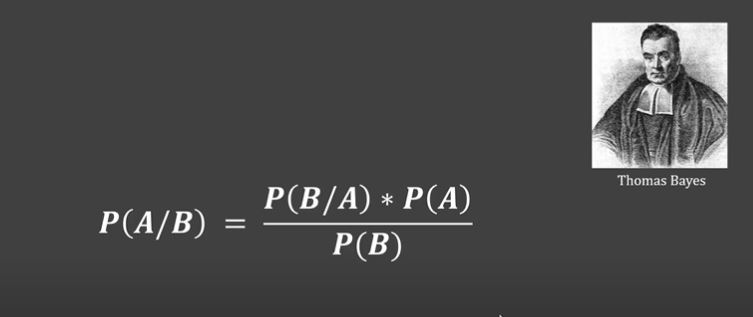

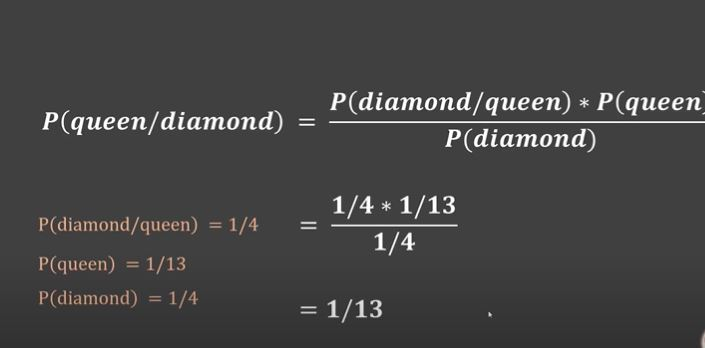

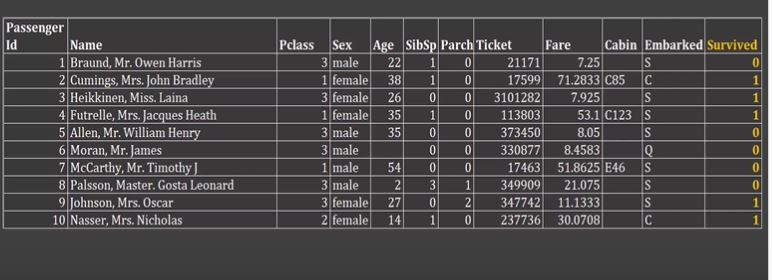

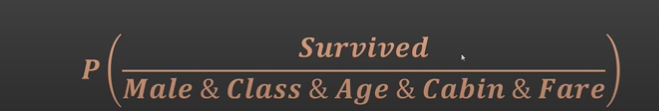

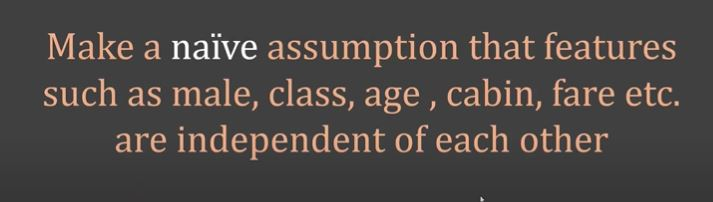

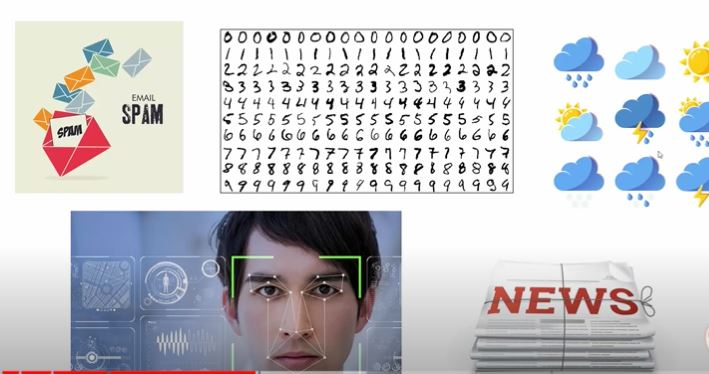

In [2]:
import pandas as pd


In [4]:
df = pd.read_csv('titanic.csv')

In [6]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [8]:
## There are some column or attribute which doesn't impact our result like name ,
## name doesn't have any impact on survival rate
## so we can drop that feature

In [9]:
df.drop(['PassengerId','Name','SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns', inplace=True)

In [10]:
df

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [11]:
## Now we will divide target and independent variable

In [12]:
target = df.Survived

In [13]:
input = df.drop('Survived', axis='columns')

In [14]:
## Machine learning models work with numeric data 
## Sex column is in text so we have to convert it into dummy columns

In [15]:
dummy = pd.get_dummies(input.Sex)

In [16]:
dummy.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [17]:
## we will append dummy column to our input dataset

In [20]:
input = pd.concat([input,dummy], axis='columns')

In [21]:
input.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [22]:
input.drop('Sex', axis='columns', inplace=True)

In [23]:
input.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [25]:
## If we want to know that our data has any 'na' values

In [26]:
input.columns[input.isna().any()]

Index(['Age'], dtype='object')

In [27]:
input.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [28]:
input.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [29]:
## We will take mean of the age columns and fill the NAN value with mean

In [30]:
input.Age = input.Age.fillna(input.Age.mean())

In [32]:
input.head(10)

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
5,3,29.699118,8.4583,0,1
6,1,54.000000,51.8625,0,1
7,3,2.000000,21.0750,0,1
8,3,27.000000,11.1333,1,0
9,2,14.000000,30.0708,1,0


In [33]:
## Now let's make ML Model

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test=train_test_split(input,target, test_size=0.2)

In [38]:
len(X_train)

712

In [39]:
len(X_test)

179

In [40]:
len(input)

891

In [41]:
X_train

,Pclass,Age,Fare,female,male
660,1,50.000000,133.6500,0,1
98,2,34.000000,23.0000,1,0
573,3,29.699118,7.7500,1,0
641,1,24.000000,69.3000,1,0
317,2,54.000000,14.0000,0,1
...,...,...,...,...,...
427,2,19.000000,26.0000,1,0
391,3,21.000000,7.7958,0,1
661,3,40.000000,7.2250,0,1
555,1,62.000000,26.5500,0,1


In [42]:
## Now let's Create Naive bayes 

In [43]:
## Here we will create Gausian Naive bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
model = GaussianNB()

In [46]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
model.score(X_test, y_test)

0.7821229050279329

In [48]:
X_test[:10]

,Pclass,Age,Fare,female,male
275,1,63.000000,77.9583,1,0
672,2,70.000000,10.5000,0,1
658,2,23.000000,13.0000,0,1
276,3,45.000000,7.7500,1,0
783,3,29.699118,23.4500,0,1
671,1,31.000000,52.0000,0,1
745,1,70.000000,71.0000,0,1
469,3,0.750000,19.2583,1,0
477,3,29.000000,7.0458,0,1
632,1,32.000000,30.5000,0,1


In [49]:
y_test[:10]

275    1
672    0
658    0
276    0
783    0
671    0
745    0
469    1
477    0
632    1
Name: Survived, dtype: int64

In [50]:
model.predict(X_test[:10])

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [51]:
model.predict_proba(X_test[:10])

array([[0.00103928, 0.99896072],
       [0.96380782, 0.03619218],
       [0.97433667, 0.02566333],
       [0.05688762, 0.94311238],
       [0.98951245, 0.01048755],
       [0.85420533, 0.14579467],
       [0.65712883, 0.34287117],
       [0.02518362, 0.97481638],
       [0.98970191, 0.01029809],
       [0.90077158, 0.09922842]])